In [1]:
#!pip install warnings
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
path = 'C:/Users/wanhu/dekist/dekist'
filenames = glob.glob(path+"/*.csv")
dfs=[] 
for filename in filenames:
    dfs.append(pd.read_csv(filename))#dfs에 csv파일 6개 

In [3]:
for i in range(len(dfs)):
    Date_time = pd.to_datetime(dfs[i].datetime,format='%Y-%m-%d %H:%M')
    dfs[i]['datetime'] = Date_time
    dfs[i].value
    print(dfs[i])

                 datetime  value
0     2020-01-01 00:07:00 -76.91
1     2020-01-01 00:17:00 -76.91
2     2020-01-01 00:27:00 -77.21
3     2020-01-01 00:37:00 -77.01
4     2020-01-01 00:47:00 -76.91
...                   ...    ...
52715 2020-12-31 23:19:00 -75.61
52716 2020-12-31 23:29:00 -75.81
52717 2020-12-31 23:39:00 -75.91
52718 2020-12-31 23:49:00 -75.81
52719 2020-12-31 23:59:00 -75.61

[52720 rows x 2 columns]
                 datetime  value
0     2020-01-01 00:08:00  -81.6
1     2020-01-01 00:18:00  -79.6
2     2020-01-01 00:28:00  -79.7
3     2020-01-01 00:38:00  -81.0
4     2020-01-01 00:48:00  -82.1
...                   ...    ...
52722 2020-12-31 23:18:00  -80.3
52723 2020-12-31 23:28:00  -79.5
52724 2020-12-31 23:38:00  -80.2
52725 2020-12-31 23:48:00  -81.1
52726 2020-12-31 23:58:00  -81.7

[52727 rows x 2 columns]
                 datetime  value
0     2020-01-01 00:02:00  -79.3
1     2020-01-01 00:12:00  -80.4
2     2020-01-01 00:22:00  -78.4
3     2020-01-01 00:32:0

In [226]:
dfs[5].value.mean()

-81.56040063257865

In [132]:
Maxt = dfs[0][dfs[0].value == dfs[0].value.max()].datetime
Mint = dfs[0][dfs[0].value == dfs[0].value.min()].datetime
Mint

6231   2020-02-13 06:04:00
Name: datetime, dtype: datetime64[ns]

최고온도: -73.01
최저온도: -77.81


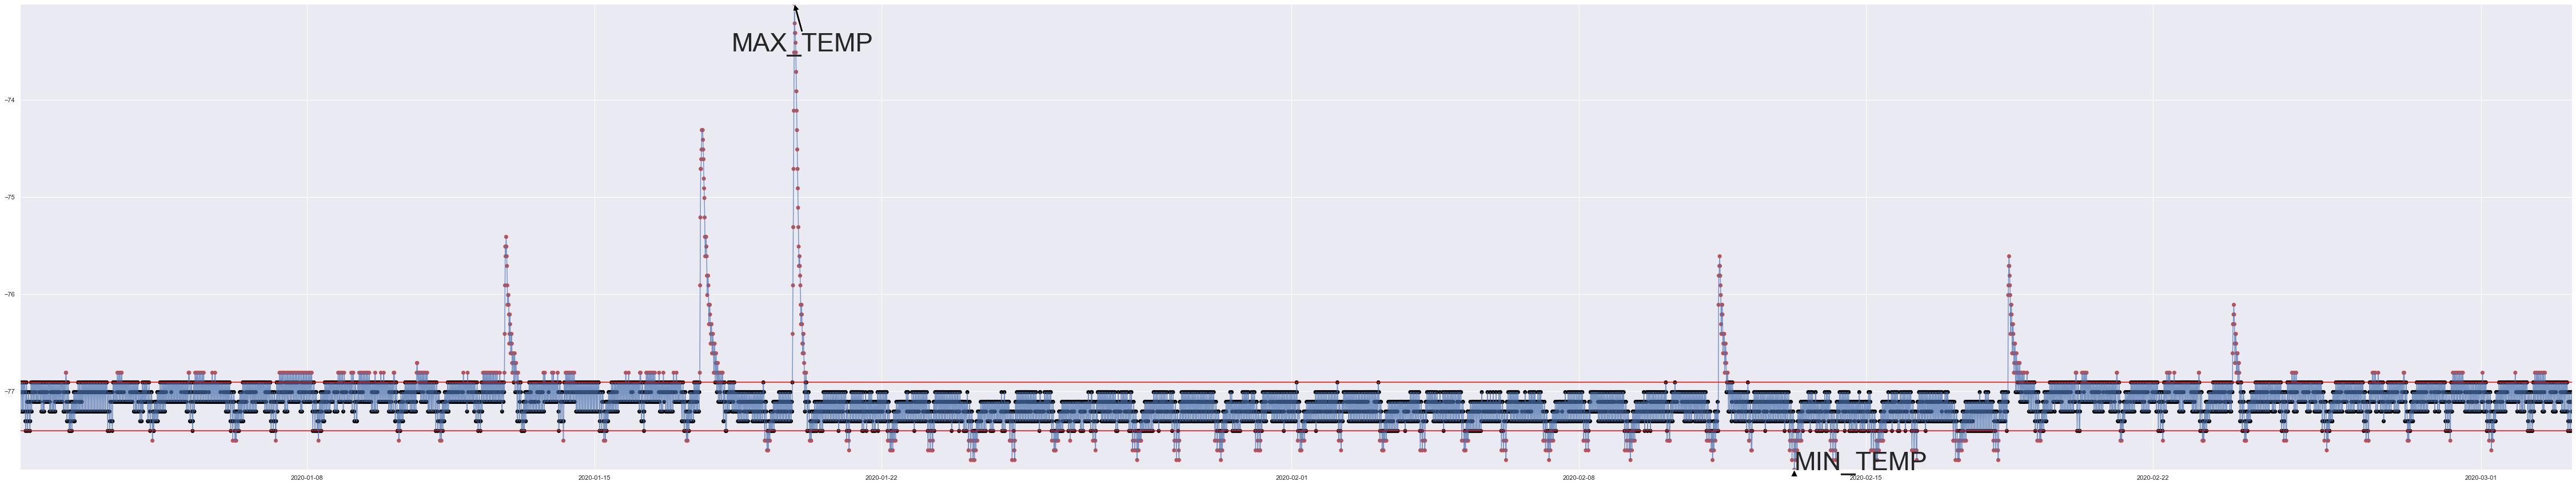

In [178]:
Maxt = dfs[0][dfs[0].value == dfs[0].value.max()].datetime
Mint = dfs[0][dfs[0].value == dfs[0].value.min()].datetime
Mint
sns.set()
plt.figure(figsize=(80,15))
plt.plot(dfs[0].datetime, dfs[0].value,alpha=0.7)
plt.xlim(dfs[0].datetime[0],dfs[0].datetime[-1:])
plt.ylim(dfs[0].value.min(),dfs[0].value.max())
MAX = MAX_temp(dfs[0].value) #최고 온도
MIN = MIN_temp(dfs[0].value) #최저 온도
print("최고온도:",MAX)
print("최저온도:",MIN)
plt.annotate('MAX_TEMP',xy=(Maxt,MAX),xytext=(dfs[0].iloc[2500].datetime,-73.5),fontsize=45,arrowprops=dict(facecolor='black'))
plt.annotate('MIN_TEMP',xy=(Mint,MIN),fontsize=45,arrowprops=dict(facecolor='black'))
dfs[0].value.value_counts().head(6) #온도 빈도수 상위 6개
maxx = -76.91 #빈도수가 높은 온도 6개 의 최대 최소 온도
minn = -77.41
plt.axhline(maxx,color='red')
plt.axhline(minn,color='red')
col = np.where(dfs[0].value > maxx,'r',np.where(dfs[0].value < minn,'r','black'))
plt.scatter(dfs[0].datetime,dfs[0].value,color=col)


최고온도: -73.01
최저온도: -77.81
-77.11    2153
-77.01    1682
-76.91    1465
-77.21    1436
-77.31    1034
-77.41     422
Name: value, dtype: int64
최고온도: -67.5
최저온도: -83.0
-79.5    658
-82.0    620
-79.4    545
-81.9    442
-79.6    405
-81.8    371
Name: value, dtype: int64
최고온도: -65.9
최저온도: -81.3
-76.4    562
-76.3    544
-76.5    474
-76.6    351
-80.4    320
-80.5    318
Name: value, dtype: int64
최고온도: -68.0
최저온도: -88.1
-86.2    488
-86.1    475
-86.3    395
-86.0    313
-85.9    258
-86.4    240
Name: value, dtype: int64
최고온도: -22.01
최저온도: -27.91
-27.01    1656
-27.11    1172
-26.81    1060
-26.91    1047
-27.21     903
-26.71     878
Name: value, dtype: int64
최고온도: -21.3
최저온도: -82.9
-82.7    545
-82.6    477
-82.4    425
-82.3    407
-82.5    401
-82.8    377
Name: value, dtype: int64


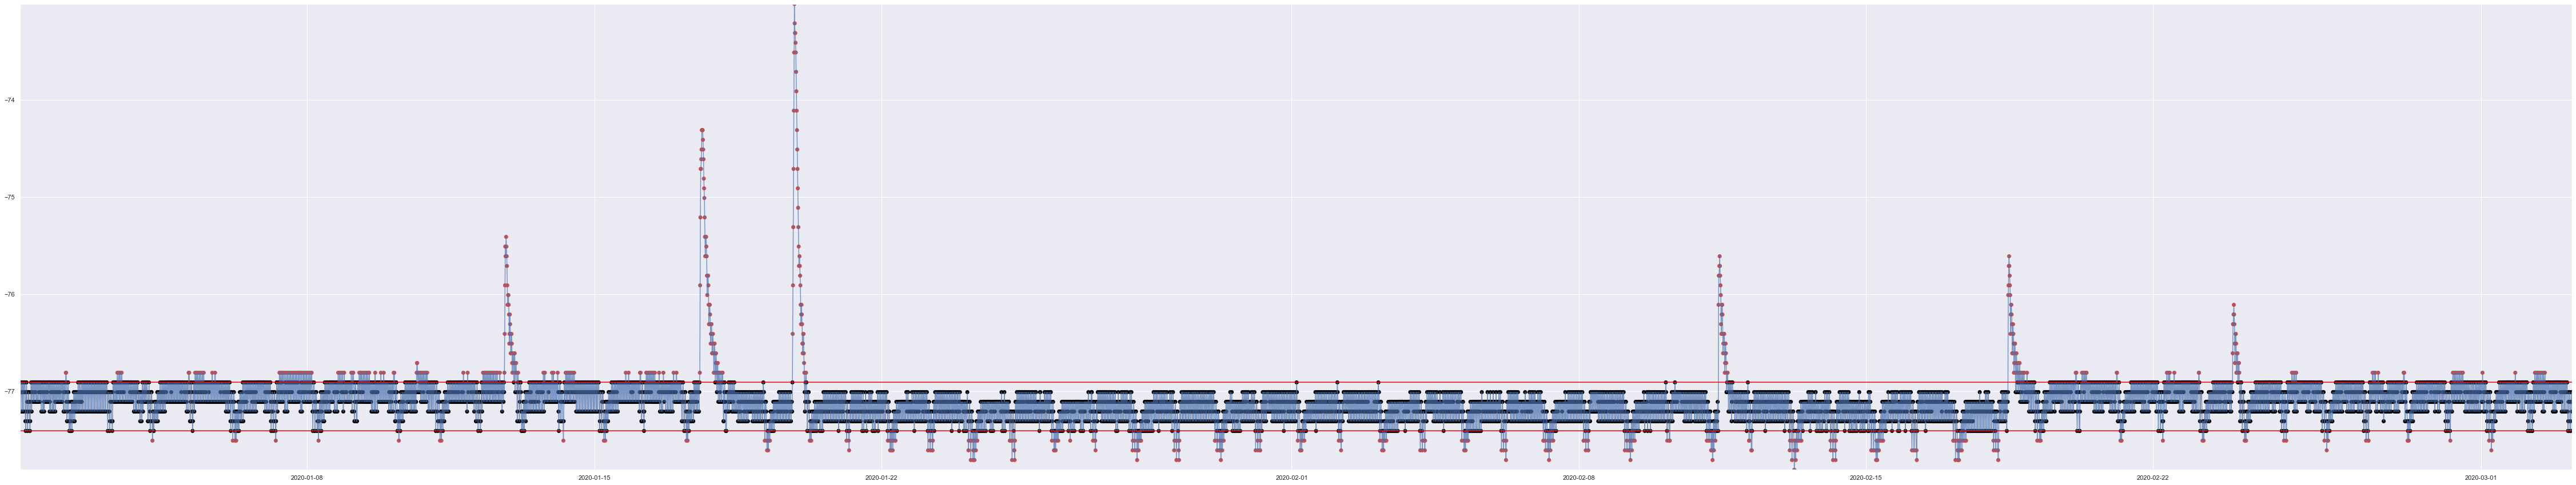

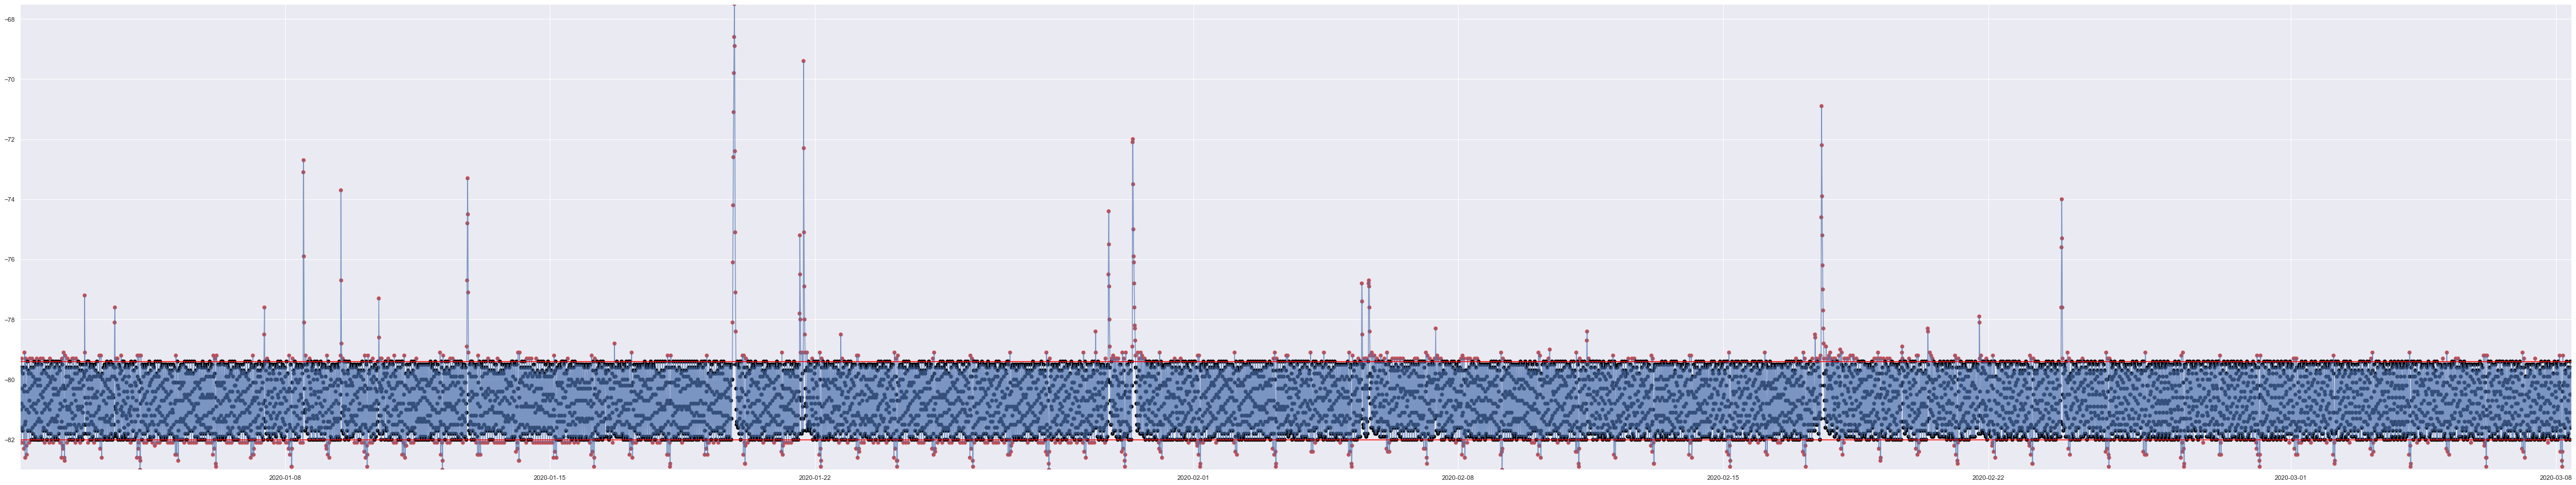

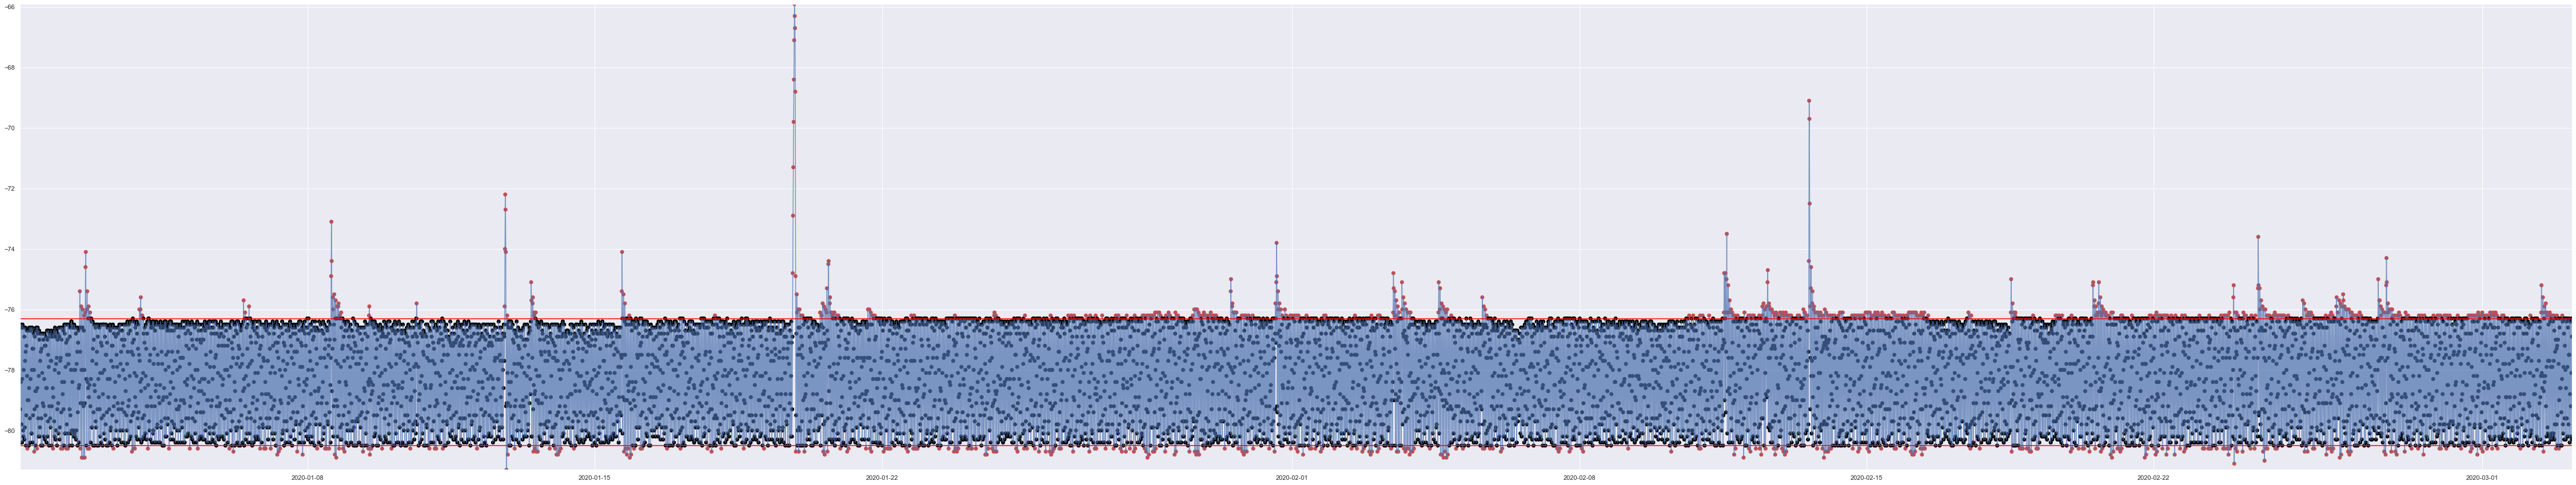

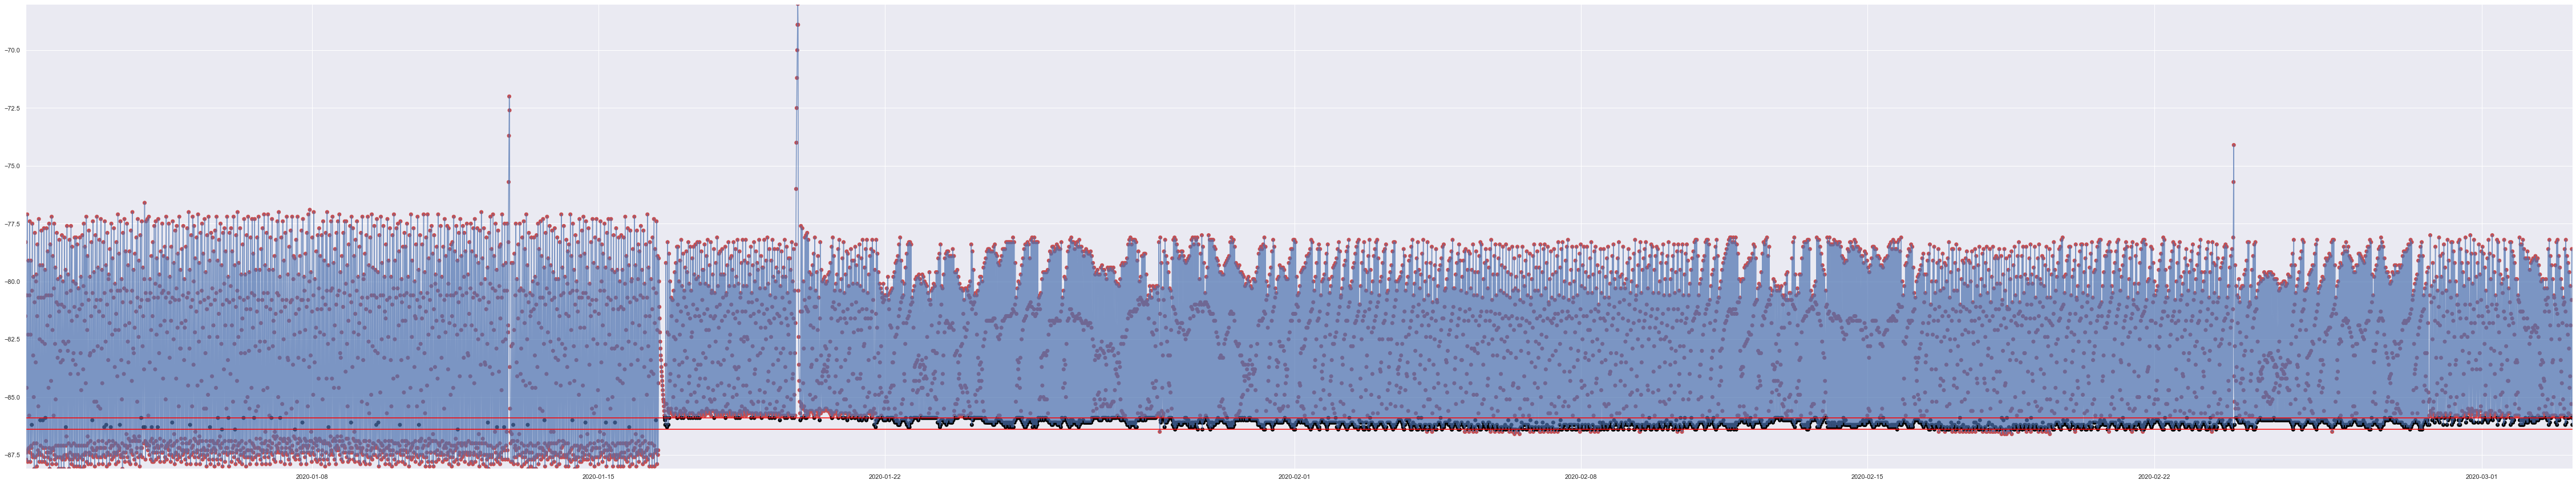

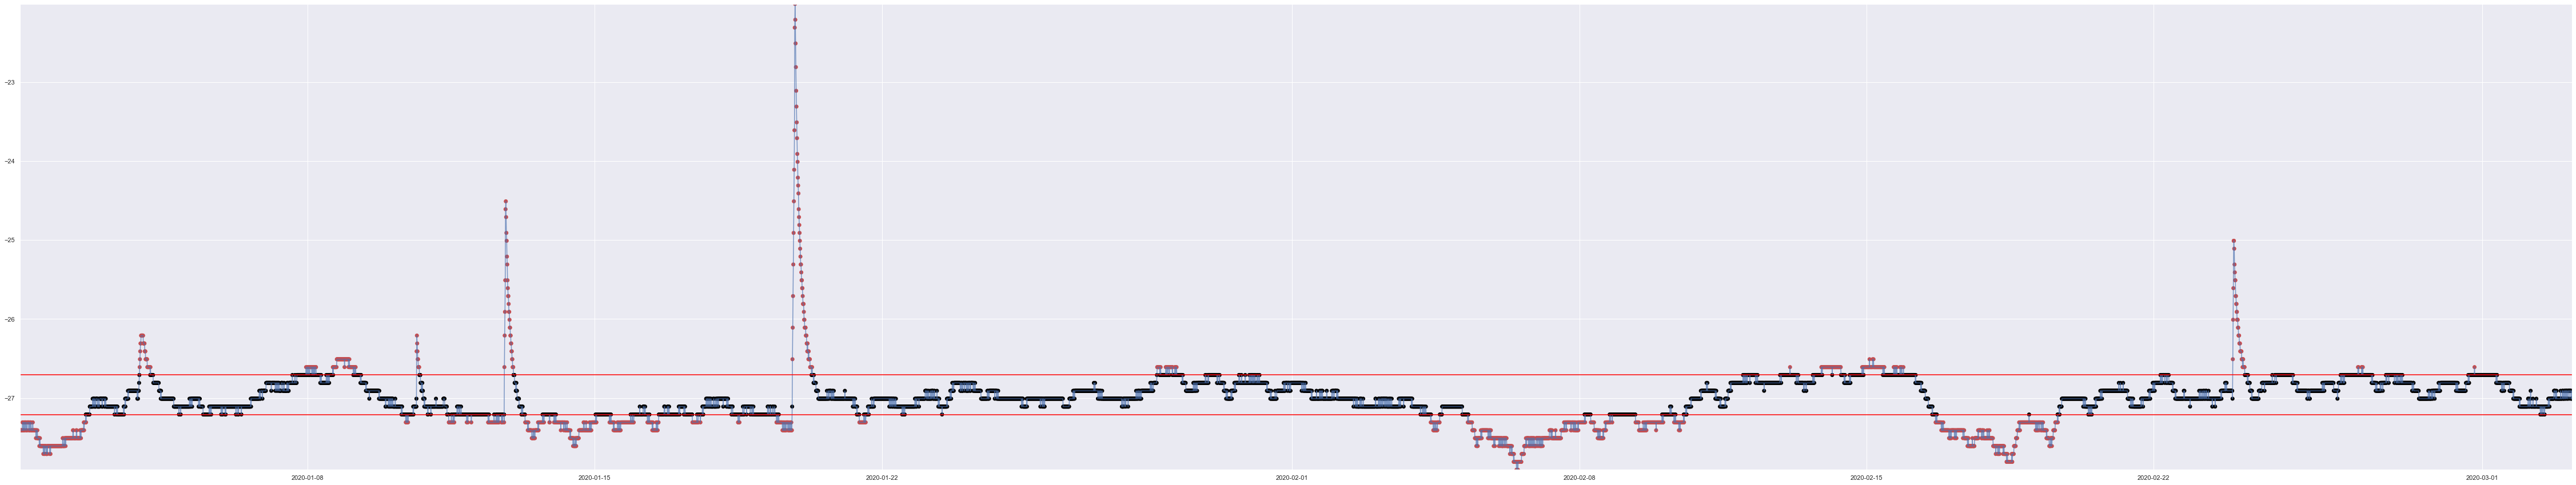

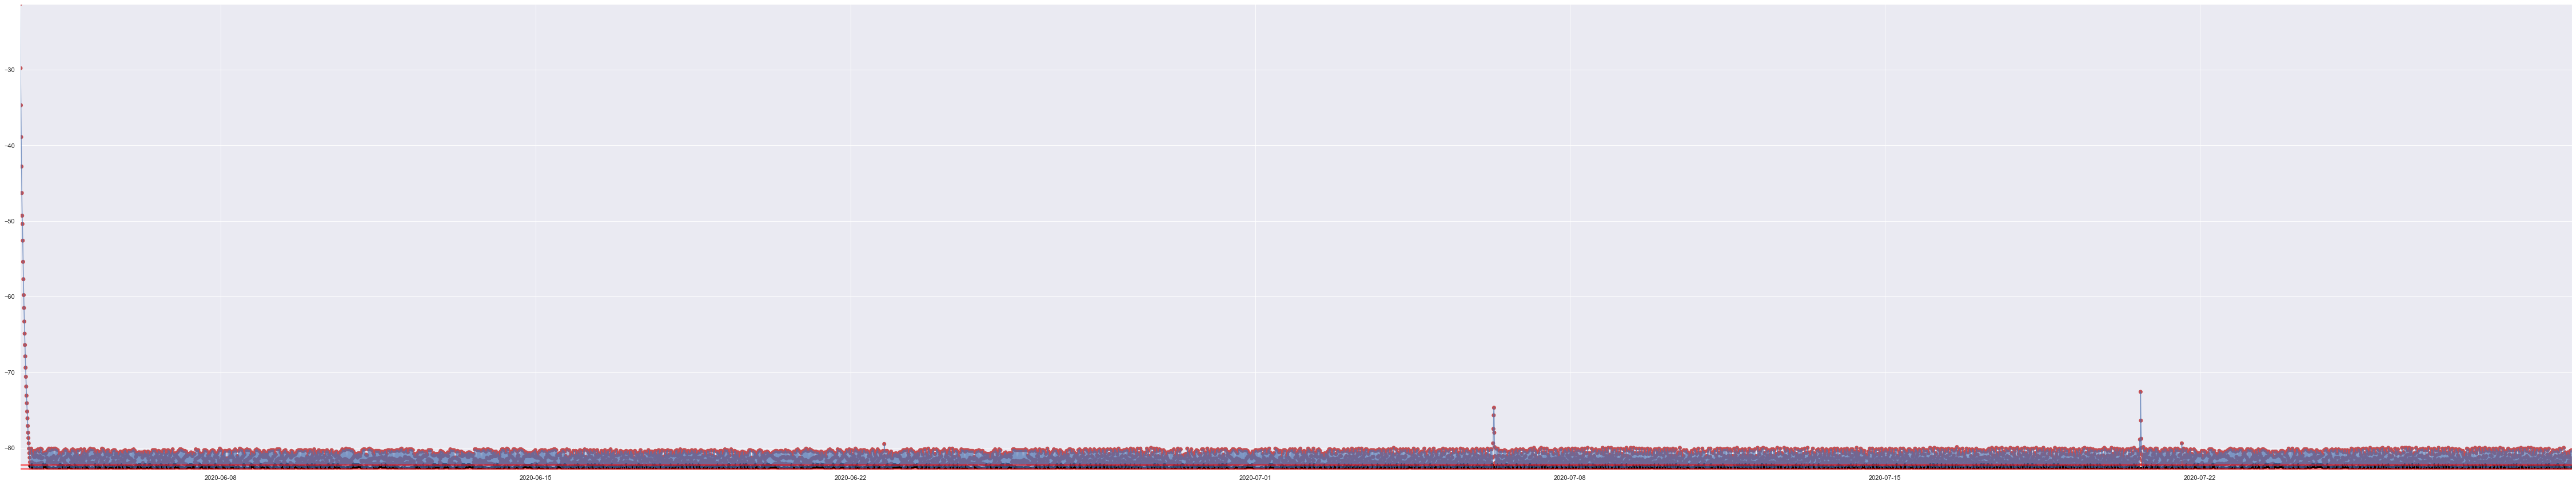

In [62]:
for i in range(len(dfs)):
    Maxt = dfs[i][dfs[i].value == dfs[i].value.max()].datetime
    Mint = dfs[i][dfs[i].value == dfs[i].value.min()].datetime
    sns.set()
    plt.figure(figsize=(80,15))
    plt.plot(dfs[i].datetime, dfs[i].value, alpha=0.7)
    plt.xlim(dfs[i].datetime[0],dfs[i].datetime.iloc[-1])
    plt.ylim(dfs[i].value.min(),dfs[i].value.max())
    MAX = dfs[i].value.max() #최고 온도
    MIN = dfs[i].value.min() #최저 온도
    print("최고온도:",MAX)
    print("최저온도:",MIN)
    #plt.annotate('MAX_TEMP',xy=(Maxt,MAX),xytext=(dfs[i].iloc[2500].datetime,-73.5),fontsize=45,arrowprops=dict(facecolor='black'))
    #plt.annotate('MIN_TEMP',xy=(Mint,MIN),fontsize=45,arrowprops=dict(facecolor='black'))
    print(dfs[i].value.value_counts().head(6)) #온도 빈도수 상위 6개
    maxx = dfs[i].value.value_counts().head(6).index.max() #빈도수가 높은 온도 6개 의 최대 최소 온도
    minn = dfs[i].value.value_counts().head(6).index.min()
    plt.axhline(maxx,color='red')
    plt.axhline(minn,color='red')
    col = np.where(dfs[i].value > maxx,'r',np.where(dfs[i].value < minn,'r','black'))
    plt.scatter(dfs[i].datetime,dfs[i].value,color=col)

최고온도: -67.5
최저온도: -83.0


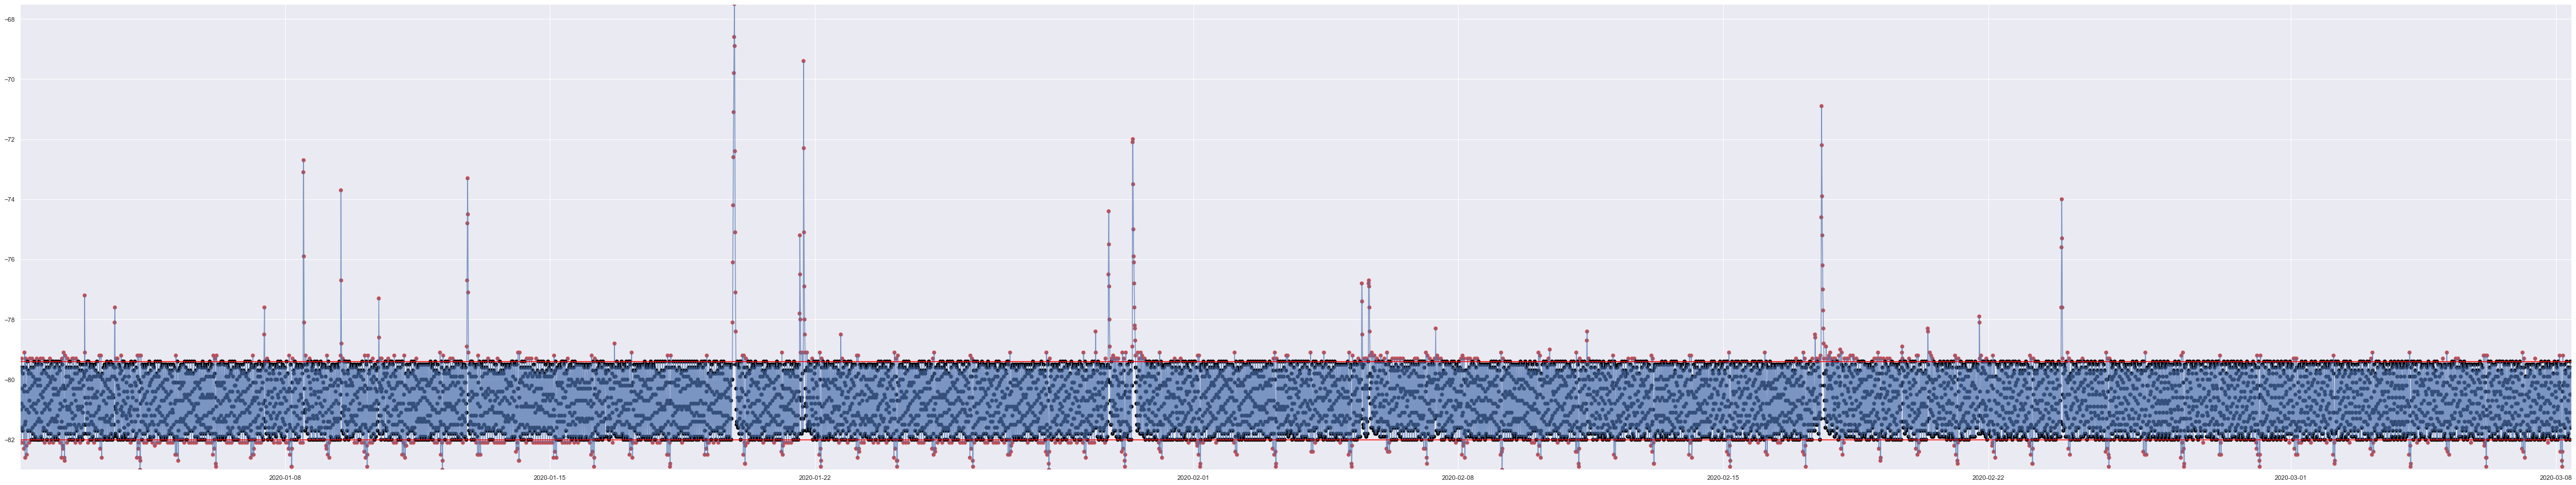

In [61]:
Maxt = dfs[1][dfs[1].value == dfs[1].value.max()].datetime
Mint = dfs[1][dfs[1].value == dfs[1].value.min()].datetime
Mint
sns.set()
plt.figure(figsize=(80,15))
plt.plot(dfs[1].datetime, dfs[1].value,alpha=0.7)
plt.xlim(dfs[1].datetime[0],dfs[1].datetime[-1:])
plt.ylim(dfs[1].value.min(),dfs[1].value.max())
MAX = MAX_temp(dfs[1].value) #최고 온도
MIN = MIN_temp(dfs[1].value) #최저 온도
print("최고온도:",MAX)
print("최저온도:",MIN)
#plt.annotate('MAX_TEMP',xy=(Maxt,MAX),fontsize=45,arrowprops=dict(facecolor='black'))
#plt.annotate('MIN_TEMP',xy=(Mint,MIN),fontsize=45,arrowprops=dict(facecolor='black'))
dfs[1].value.value_counts().head(6) #온도 빈도수 상위 6개
maxx = dfs[1].value.value_counts().head(6).index.max() #빈도수가 높은 온도 6개 의 최대 최소 온도
minn = dfs[1].value.value_counts().head(6).index.min()
plt.axhline(maxx,color='red')
plt.axhline(minn,color='red')
col = np.where(dfs[1].value > maxx,'r',np.where(dfs[1].value < minn,'r','black'))
plt.scatter(dfs[1].datetime,dfs[1].value,color=col)

In [47]:
dfs[0].value.value_counts().head(6).index.max()
dfs[0].value.value_counts().head(6).index.min()

-77.41

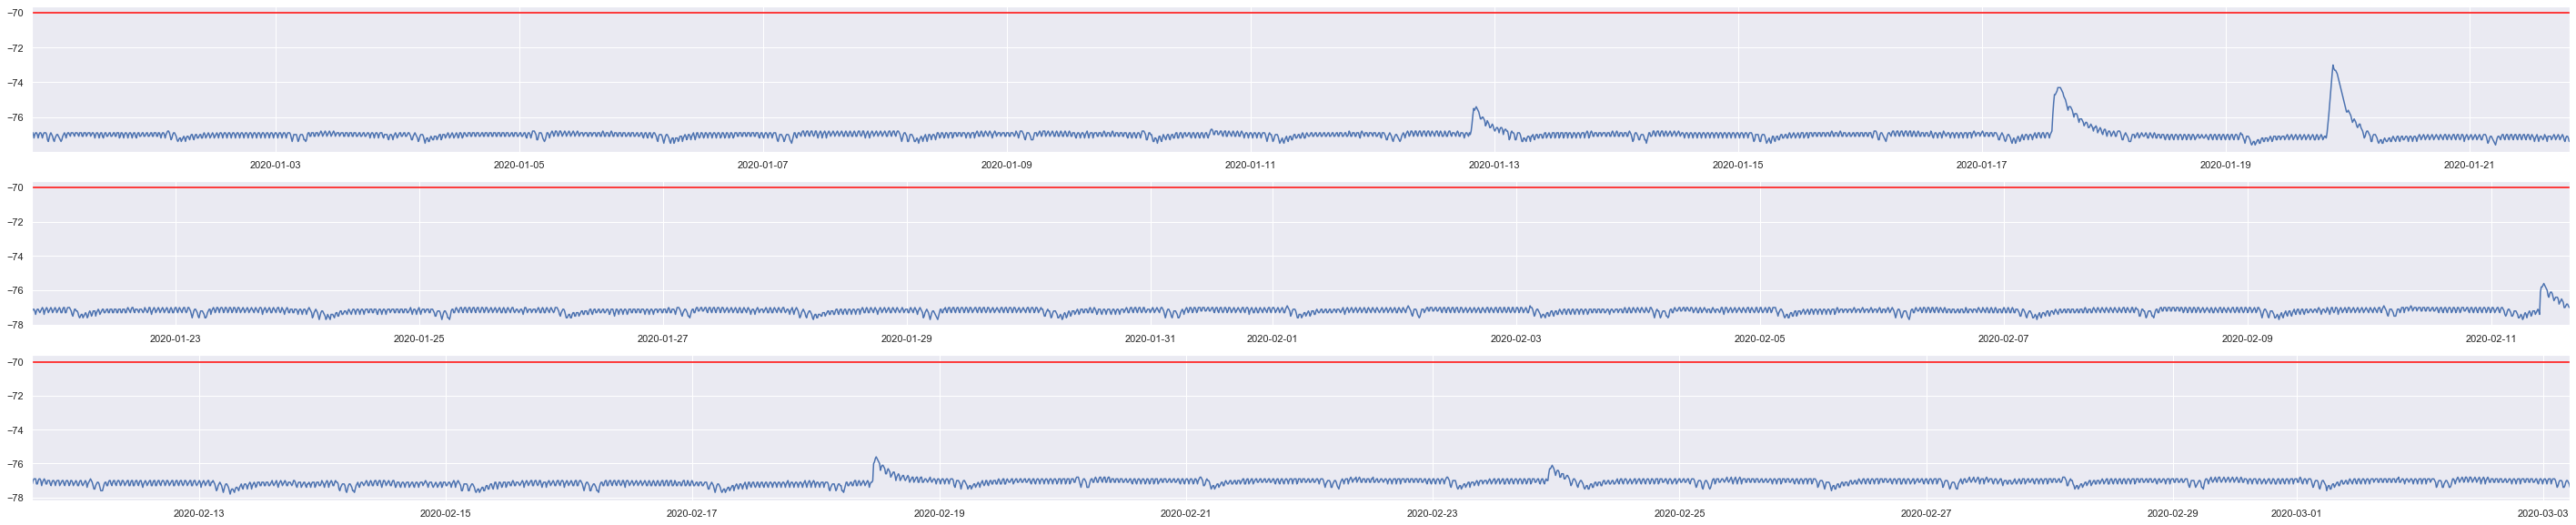

In [37]:
plt.figure(figsize=(50,10))
plt.subplot(3,1,1)
plt.plot(dfs[0].datetime[:3000],dfs[0].value[:3000])
plt.xlim(dfs[0].datetime[0],dfs[0].datetime[3000])

plt.subplot(3,1,2)
plt.plot(dfs[0].datetime[3000:6000],dfs[0].value[3000:6000])
plt.xlim(dfs[0].datetime[3000],dfs[0].datetime[6000])

plt.subplot(3,1,3)
plt.plot(dfs[0].datetime[6000:],dfs[0].value[6000:])
plt.xlim(dfs[0].datetime[6000],dfs[0].datetime.iloc[-1])


In [234]:
dfs[0].value.value_counts().head(6).sum()#총 온도 측정 횟수

8192

In [236]:
dfs[0].value.value_counts().sum()-dfs[0].value.value_counts().head(6).sum() #임계치 벗어난 횟수

771

In [69]:
dfs[2]

datetime  value
0    2020-01-01 00:02:00  -79.3
1    2020-01-01 00:12:00  -80.4
2    2020-01-01 00:22:00  -78.4
3    2020-01-01 00:32:00  -76.5
4    2020-01-01 00:42:00  -76.6
...                  ...    ...
8958 2020-03-03 04:07:00  -80.2
8959 2020-03-03 04:17:00  -78.1
8960 2020-03-03 04:27:00  -76.3
8961 2020-03-03 04:37:00  -76.9
8962 2020-03-03 04:47:00  -80.3

[8963 rows x 2 columns]

In [38]:
dfs[1].value.value_counts().head(6)

-79.5    658
-82.0    620
-79.4    545
-81.9    442
-79.6    405
-81.8    371
Name: value, dtype: int64

In [67]:
dfs[3].value.value_counts()
dfs[4].value.value_counts()
dfs[5].value.value_counts()

-82.7    545
-82.6    477
-82.4    425
-82.3    407
-82.5    401
        ... 
-63.3      1
-78.9      1
-72.6      1
-77.1      1
-61.5      1
Name: value, Length: 67, dtype: int64

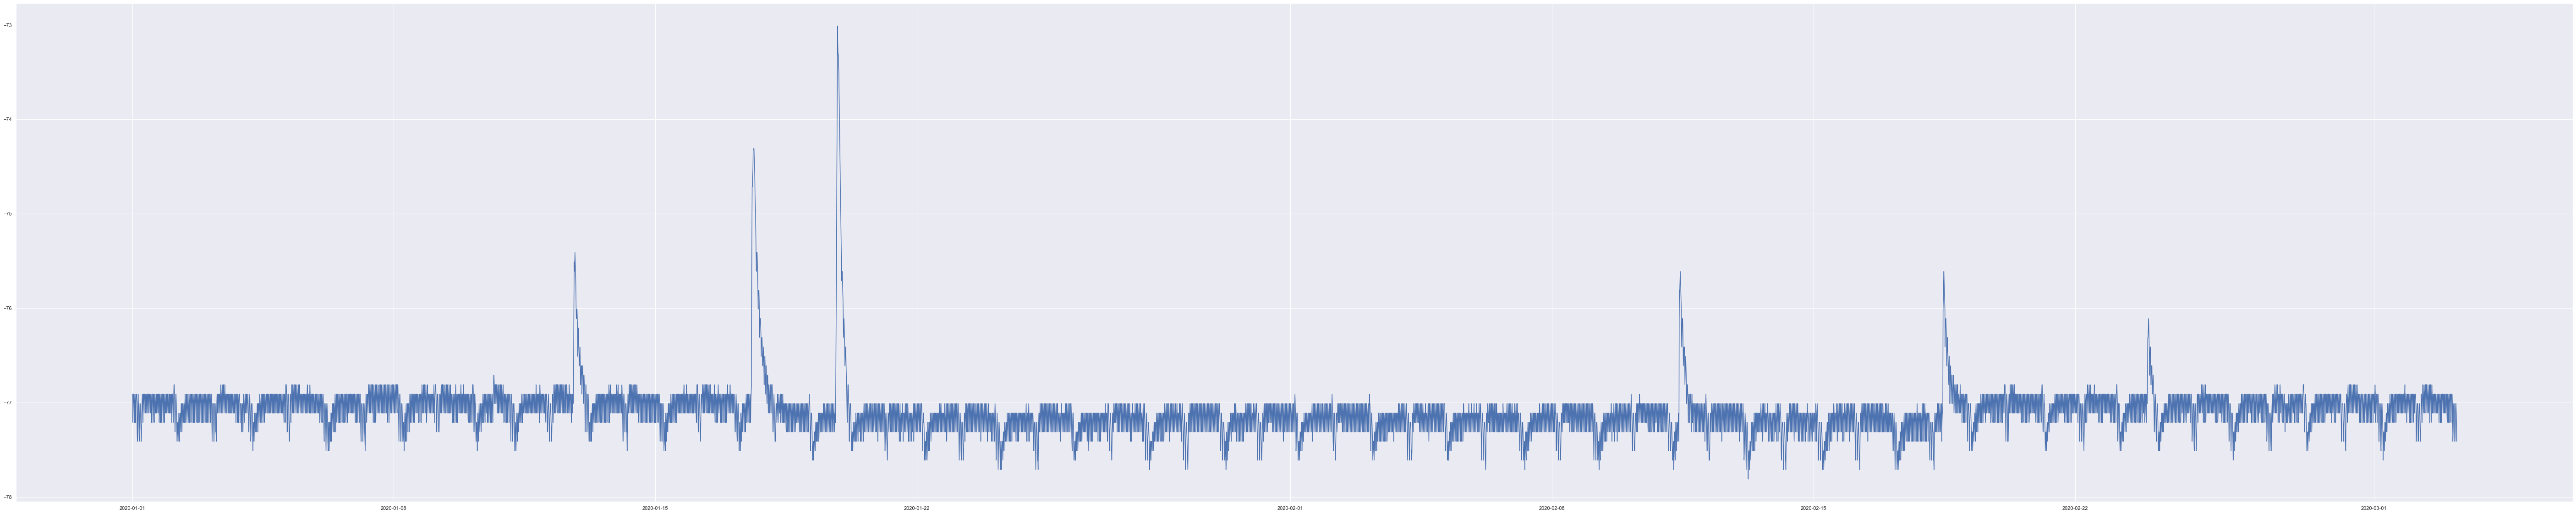

In [71]:
plt.figure(figsize=(100,20))
plt.plot(dfs[0].datetime, dfs[0].value)

In [8]:
dfs[0]

datetime  value class  Temp
0    2020-01-01 00:07:00 -76.91  warm     0
1    2020-01-01 00:17:00 -76.91  cold     0
2    2020-01-01 00:27:00 -77.21  warm     0
3    2020-01-01 00:37:00 -77.01  warm     0
4    2020-01-01 00:47:00 -76.91  warm     0
...                  ...    ...   ...   ...
8958 2020-03-03 04:34:00 -77.01  warm     0
8959 2020-03-03 04:44:00 -77.01  cold     0
8960 2020-03-03 04:54:00 -77.11  cold     0
8961 2020-03-03 05:04:00 -77.21  cold     0
8962 2020-03-03 05:14:00 -77.41     0     0

[8963 rows x 4 columns]

In [214]:
dfs[0]['class'] = 0  #1번 파일만 데이터 추가
dfs[0]['Temp'] = 0
dfs[0]['Time'] = 0
dfs[0]['gradient'] = 0
for i in range(len(dfs[0])-1):
    if dfs[0].value[i] > dfs[0].value[i+1]: 
        dfs[0].loc[:,'class'].iloc[i] = 'cold' #냉동
        dfs[0].loc[:,'Temp'].iloc[i] = dfs[0].value[i+1] - dfs[0].value[i]
        T = dfs[0].datetime[i+1] - dfs[0].datetime[i]
        dfs[0].loc[:,'Time'].iloc[i] = T.seconds
        dfs[0].loc[:,'gradient'].iloc[i] = abs(dfs[0].Temp[i]/dfs[0].Time[i])
    else:
        dfs[0].loc[:,'class'].iloc[i] = 'warm' #보온
        dfs[0].loc[:,'Temp'].iloc[i] = dfs[0].value[i+1] - dfs[0].value[i]
        T = dfs[0].datetime[i+1] - dfs[0].datetime[i]
        dfs[0].loc[:,'Time'].iloc[i] = T.seconds
        dfs[0].loc[:,'gradient'].iloc[i] = abs(dfs[0].Temp[i]/dfs[0].Time[i])
#a = dfs[0].datetime[2] - dfs[0].datetime[0]
#a.seconds # 다음 측정값까지의 시간초차이
dfs[0].groupby('class').mean()

value      Temp        Time  gradient
class                                           
0     -75.610000  0.000000    0.000000  0.000000
cold  -76.348255 -0.134255  599.977804  0.000224
warm  -76.648098  0.115097  599.685100  0.000192

In [204]:
dfs[0].groupby('class').value.max().max()
dfs[0].groupby('class').value.min().min()
dfs[0].groupby('class').max()
B = []
C = []
for i in range(len(dfs)):
        B.append(dfs[i].value.max())
        C.append(dfs[i].value.min())
np.array(B)

array([-73.01, -67.5 , -65.9 , -68.  , -22.01, -21.3 ])

In [4]:
A=[]
for j in range(len(dfs)): # 모든 파일에 데이터 추가
    dfs[j]['class'] = 0
    dfs[j]['Temp'] = 0
    dfs[j]['Time'] = 0
    dfs[j]['gradient'] = 0
    for i in range(len(dfs[j])-1):
        if dfs[j].value[i] > dfs[j].value[i+1]: # 바로 전에 측정한 값과 비교하여 냉각 상태인지 보온 상태인지 구분
            dfs[j]['class'].iloc[i] = 'cold' #냉동
            dfs[j]['Temp'].iloc[i] = dfs[j].value[i+1] - dfs[j].value[i] #온도차이
            T = dfs[j].datetime[i+1] - dfs[j].datetime[i] #시간차이
            dfs[j]['Time'].iloc[i] = T.seconds #시간차이를 초단위로 바꿈
            dfs[j]['gradient'].iloc[i] = abs(dfs[j].Temp[i]/dfs[j].Time[i]*100000) # 시간과 온도를 이용해 기울기를 구하고 절대값
        else:
            dfs[j]['class'].iloc[i] = 'warm' #보온
            dfs[j]['Temp'].iloc[i] = dfs[j].value[i+1] - dfs[j].value[i]
            T = dfs[j].datetime[i+1] - dfs[j].datetime[i]
            dfs[j]['Time'].iloc[i] = T.seconds
            dfs[j]['gradient'].iloc[i] = abs(dfs[j].Temp[i]/dfs[j].Time[i]*100000)
    dfs[j] = dfs[j].iloc[:-1,:] # 마지막 측정온도는 더이상 비교할 다음 측정기록이 없으므로 삭제
    A.append(dfs[j].groupby('class').mean().gradient) # 각 장비의 기울기
Performance = pd.concat(A,axis=1)  # 각 장비의 기울기들을 한곳에 합침
Performance


KeyboardInterrupt: 

In [246]:
dfs[0].Time
dfs[5].Temp.mean()

-0.002175364610788965

In [213]:
Performance

gradient  gradient  gradient  gradient  gradient  gradient    Max
class                                                                   
cold   0.000261  0.001565  0.003127  0.007103  0.000172  0.001675  100.0
warm   0.000146  0.002008  0.002583  0.005266  0.000020  0.001877  100.0
MAX         NaN       NaN       NaN       NaN       NaN       NaN    NaN

In [151]:
dfs

[                datetime  value class  Temp  Time  gradient
 0    2020-01-01 00:07:00 -76.91  warm   0.0   600  0.000000
 1    2020-01-01 00:17:00 -76.91  cold  -0.3   600  0.000500
 2    2020-01-01 00:27:00 -77.21  warm   0.2   600  0.000333
 3    2020-01-01 00:37:00 -77.01  warm   0.1   600  0.000167
 4    2020-01-01 00:47:00 -76.91  warm   0.0   600  0.000000
 ...                  ...    ...   ...   ...   ...       ...
 8956 2020-03-03 04:14:00 -77.31  warm   0.2   600  0.000333
 8957 2020-03-03 04:24:00 -77.11  warm   0.1   600  0.000167
 8958 2020-03-03 04:34:00 -77.01  warm   0.0   600  0.000000
 8959 2020-03-03 04:44:00 -77.01  cold  -0.1   600  0.000167
 8960 2020-03-03 04:54:00 -77.11     0   0.0     0  0.000000
 
 [8961 rows x 6 columns],
                 datetime  value class  Temp  Time  gradient
 0    2020-01-01 00:08:00  -81.6  warm   2.0   600  0.003333
 1    2020-01-01 00:18:00  -79.6  cold  -0.1   600  0.000167
 2    2020-01-01 00:28:00  -79.7  cold  -1.3   600  0.002

In [136]:
for c,n in dfs[0].groupby('class'):
    print(c)
    print(n)

cold
                datetime  value class  Temp  Time  gradient
1    2020-01-01 00:17:00 -76.91  cold  -0.3   600  0.000500
5    2020-01-01 00:57:00 -76.91  cold  -0.1   600  0.000167
6    2020-01-01 01:07:00 -77.01  cold  -0.2   600  0.000333
10   2020-01-01 01:47:00 -76.91  cold  -0.1   600  0.000167
11   2020-01-01 01:57:00 -77.01  cold  -0.2   600  0.000333
...                  ...    ...   ...   ...   ...       ...
8946 2020-03-03 02:34:00 -77.21  cold  -0.2   600  0.000333
8952 2020-03-03 03:34:00 -77.01  cold  -0.1   600  0.000167
8953 2020-03-03 03:44:00 -77.11  cold  -0.3   600  0.000500
8959 2020-03-03 04:44:00 -77.01  cold  -0.1   600  0.000167
8960 2020-03-03 04:54:00 -77.11  cold  -0.1   600  0.000167

[3216 rows x 6 columns]
warm
                datetime  value class  Temp  Time  gradient
0    2020-01-01 00:07:00 -76.91  warm   0.0   600  0.000000
2    2020-01-01 00:27:00 -77.21  warm   0.2   600  0.000333
3    2020-01-01 00:37:00 -77.01  warm   0.1   600  0.000167
4    

gradient  gradient  gradient  gradient  gradient  gradient
class                                                            
cold   0.000261  0.001565  0.003127  0.007103  0.000172  0.001675
warm   0.000146  0.002008  0.002583  0.005266  0.000020  0.001877

냉각일때는 기울기가 크면 성능이 좋음 
보온일때는 기울기가 작으면 성능이 좋음

냉각에서는 4번째 파일의 장비가 가장 성능이 좋고, 5번째 파일이 장비 성능이 안좋다

보온에서는 5번째 파일의 장비가 가장 성능이 좋고, 4번째 파일이 장비 성능이 안좋다

In [137]:
Performance.max(axis=1) #최대 기울기 구하기

class
cold    0.007103
warm    0.005266
dtype: float64

In [138]:
Performance.min(axis=1) #최소 기울기 구하기

class
cold    0.000172
warm    0.000020
dtype: float64

In [162]:
co = Performance.mean(axis=1).values[0] # 냉각 상태 기울기의 평균
wa = Performance.mean(axis=1).values[1] # 보온 상태 기울기의 평균

0.004786121468427194

In [140]:
co1 = (Performance.iloc[0]/co *100) - 100 # 냉각 상태일때 평균대비 효율 % ?

In [141]:
wa1 = (Performance.iloc[1]/wa *100) - 100 # 보온 상태일때 평균대비 효율 % ?

In [142]:
new = pd.concat([co1,wa1],axis=1) #위에서 구한 데이터 합치기

In [143]:
new  

cold        warm
gradient  -88.748793  -92.643212
gradient  -32.465445    1.249535
gradient   34.950790   30.227676
gradient  206.569381  165.509026
gradient  -92.587941  -98.966635
gradient  -27.717992   -5.376389

In [158]:
abs(new['cold'] - new['warm'])

gradient     3.894419
gradient    33.714980
gradient     4.723114
gradient    41.060355
gradient     6.378695
gradient    22.341602
dtype: float64